<h1>Workshop 6 - Market Basket Analysis using Apriori Algorithm

In [1]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Workshop-06-dataset.zip', sep='\t',dtype=np.str)

<h4>Q1. Print the first five rows of the dataset.

In [3]:
df.head(5)

,transaction_ID,Date,Time,item_0,item_1,item_2,item_3,item_4,item_5,item_6,...,item_31,item_32,item_33,item_34,item_35,item_36,item_37,item_38,item_39,item_40
0,536365,01/12/2010,08:26,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART,SET 7 BABUSHKA NESTING BOXES,GLASS STAR FROSTED T-LIGHT HOLDER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,536366,01/12/2010,08:28,HAND WARMER UNION JACK,HAND WARMER RED POLKA DOT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,536367,01/12/2010,08:34,ASSORTED COLOUR BIRD ORNAMENT,POPPY'S PLAYHOUSE BEDROOM,POPPY'S PLAYHOUSE KITCHEN,FELTCRAFT PRINCESS CHARLOTTE DOLL,IVORY KNITTED MUG COSY,BOX OF 6 ASSORTED COLOUR TEASPOONS,BOX OF VINTAGE JIGSAW BLOCKS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,536368,01/12/2010,08:34,JAM MAKING SET WITH JARS,RED COAT RACK PARIS FASHION,YELLOW COAT RACK PARIS FASHION,BLUE COAT RACK PARIS FASHION,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,536369,01/12/2010,08:35,BATH BUILDING BLOCK WORD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h6>Answer 1.<p>Using the .head(n) function to show a number of entries in the dataset based on the value of n.

<h4>Q2. How many rows and columns are there in the dataset?

In [4]:
df.shape

(31941, 44)

<h6>Answer 2.<p> There are 31,941 rows and 44 columns in the dataset.

<h2> Generating your unique Dataset

In [5]:
STUDENT_NAME = 'ChristopherMitchell'
STUDENT_NO = '8979'

In [6]:
np.random.seed(int(STUDENT_NO))
unique_id = int('2' + STUDENT_NO)
rows = np.random.choice(df.index.values, unique_id)
data = df.loc[rows]

In [7]:
file_name = STUDENT_NAME + "_" + STUDENT_NO + ".csv"
data.to_csv(file_name)

<h2>Basic Data Analysis

<h4>Q3. How many unique dates are there in the dataset? HINT: You can use the .nunique() function available in Pandas.

In [8]:
data = pd.read_csv("ChristopherMitchell_8979.csv")

In [9]:
data.nunique(axis=1, dropna=True)

0        28
1        41
2        45
3        45
4        20
         ..
28974    19
28975    26
28976     5
28977    25
28978    35
Length: 28979, dtype: int64

<h6>Answer 3.<p>Using the Nunique function we can see that column 2, which is the date column, has 45 unique values. I have used the dropna=True argument to exclude NaN values in this count.

In [10]:
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour

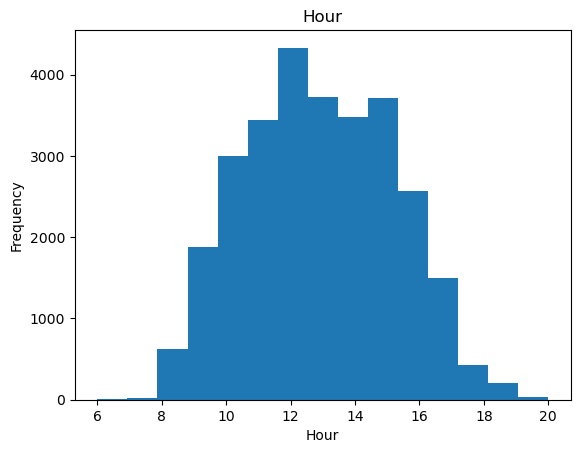

In [11]:
hour_hist = data.hist(column="Hour", bins=15, grid=False)

for ax in hour_hist.flatten():
    ax.set_xlabel("Hour")
    ax.set_ylabel("Frequency")

<h2>Apriori Algorithm

In [12]:
import apyori
from apyori import apriori

Data Preprocessing

In [13]:
items_df=data[data.columns[3:44]]

In [14]:
items_df.head()

,Time,item_0,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,...,item_30,item_31,item_32,item_33,item_34,item_35,item_36,item_37,item_38,item_39
0,16:31,ROUND CAKE TIN VINTAGE RED,BISCUIT TIN VINTAGE RED,ROUND CAKE TIN VINTAGE GREEN,BISCUIT TIN VINTAGE GREEN,OVEN MITT APPLES DESIGN,BLUE FELT EASTER EGG BASKET,CREAM FELT EASTER EGG BASKET,PICNIC BASKET WICKER LARGE,PICNIC BASKET WICKER SMALL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14:30,CHARLOTTE BAG DOLLY GIRL DESIGN,RED RETROSPOT CHARLOTTE BAG,CHARLOTTE BAG PINK POLKADOT,STRAWBERRY CHARLOTTE BAG,WOODLAND CHARLOTTE BAG,BLUE/CREAM STRIPE CUSHION COVER,RED/CREAM STRIPE CUSHION COVER,ANT WHITE WIRE HEART SPIRAL,PINK HAPPY BIRTHDAY BUNTING,...,RED RETROSPOT WASHBAG,RED RETROSPOT WASHBAG,RED RETROSPOT OVEN GLOVE DOUBLE,EDWARDIAN PARASOL RED,RETRO LEAVES MAGNETIC NOTEPAD,PANTRY MAGNETIC SHOPPING LIST,SKETCHBOOK MAGNETIC SHOPPING LIST,IVORY REFECTORY CLOCK,FELT TOADSTOOL LARGE,PARTY METAL SIGN
2,16:39,TRADITIONAL WOODEN CATCH CUP GAME,"KEY FOB , SHED",PHARMACIE FIRST AID TIN,CHOCOLATE THIS WAY METAL SIGN,VINTAGE SNAKES & LADDERS,BLUE HARMONICA IN BOX,SET 12 RETRO WHITE CHALK STICKS,SET 12 KIDS COLOUR CHALK STICKS,UNION STRIPE WITH FRINGE HAMMOCK,...,CHRISTMAS PUDDING TRINKET POT,6 RIBBONS SHIMMERING PINKS,6 RIBBONS ELEGANT CHRISTMAS,6 RIBBONS EMPIRE,6 RIBBONS RUSTIC CHARM,PAPER CHAIN KIT RETROSPOT,PAPER CHAIN KIT 50'S CHRISTMAS,PAPER BUNTING RETROSPOT,LADS ONLY TISSUE BOX,BOUDOIR SQUARE TISSUE BOX
3,17:37,COTTON APRON PANTRY DESIGN,SET OF 4 PANTRY JELLY MOULDS,MARIE ANTOINETTE TRINKET BOX SILVER,RABBIT NIGHT LIGHT,PACK OF 6 COCKTAIL PARASOL STRAWS,FELTCRAFT GIRL NICOLE KIT,CLASSIC CAFE SUGAR DISPENSER,REGENCY TEA PLATE ROSES,REGENCY TEA PLATE GREEN,...,SET OF 60 PANTRY DESIGN CAKE CASES,SET OF 60 VINTAGE LEAF CAKE CASES,SET 6 SCHOOL MILK BOTTLES IN CRATE,IVORY WICKER HEART LARGE,CHILDRENS TOY COOKING UTENSIL SET,SET OF 3 BIRD LIGHT PINK FEATHER,VINTAGE BEAD PINK PURSE,BLUE FELT HANGING HEART WITH FLOWER,PINK FELT HANGING HEART W FLOWER,FOLKART ZINC HEART CHRISTMAS DEC
4,12:35,HEART IVORY TRELLIS LARGE,ANTIQUE SILVER T-LIGHT GLASS,SMALL GLASS HEART TRINKET POT,ANTIQUE TALL SWIRLGLASS TRINKET POT,WOODEN FRAME ANTIQUE WHITE,NOEL WOODEN BLOCK LETTERS,WOODEN PICTURE FRAME WHITE FINISH,FELTCRAFT CUSHION OWL,FELTCRAFT DOLL MARIA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
baskets = items_df.T.apply(lambda x: x.dropna().tolist()).tolist()

In [16]:
for i in baskets[:5]:
    print(i)

['16:31', 'ROUND CAKE TIN VINTAGE RED', 'BISCUIT TIN VINTAGE RED', 'ROUND CAKE TIN VINTAGE GREEN', 'BISCUIT TIN VINTAGE GREEN', 'OVEN MITT APPLES DESIGN', 'BLUE FELT EASTER EGG BASKET', 'CREAM FELT EASTER EGG BASKET', 'PICNIC BASKET WICKER LARGE', 'PICNIC BASKET WICKER SMALL', 'EASTER BUNNY WITH BASKET ON BACK', 'RED RETROSPOT PEG BAG', 'RED RETROSPOT ROUND CAKE TINS', 'CAKE STAND 3 TIER MAGIC GARDEN', 'CAKE STAND VICTORIAN FILIGREE MED', 'ROSES REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER', 'GREEN REGENCY TEACUP AND SAUCER', 'JAM MAKING SET WITH JARS', 'TEA TIME TEAPOT IN GIFT BOX', 'TEA TIME PARTY BUNTING', 'PACK OF 20 NAPKINS PANTRY DESIGN', 'COTTON APRON PANTRY DESIGN', 'GINGERBREAD MAN COOKIE CUTTER', 'APRON APPLE DELIGHT']
['14:30', 'CHARLOTTE BAG DOLLY GIRL DESIGN', 'RED RETROSPOT CHARLOTTE BAG', 'CHARLOTTE BAG PINK POLKADOT', 'STRAWBERRY CHARLOTTE BAG', 'WOODLAND CHARLOTTE BAG', 'BLUE/CREAM STRIPE CUSHION COVER', 'RED/CREAM STRIPE CUSHION COVER', 'ANT WHITE WIRE 

<h2>Algorithm Parameters

In [17]:
association_rules = apriori(baskets, min_support=0.01, min_confidence=0.2,
                            min_lift=3, min_length=2)
association_results = list(association_rules)

In [18]:
print('Rules generated: ', len(association_results))

Rules generated:  83


In [19]:
print(association_results[0])

RelationRecord(items=frozenset({'ALARM CLOCK BAKELIKE IVORY', 'ALARM CLOCK BAKELIKE GREEN'}), support=0.010041754373856931, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ALARM CLOCK BAKELIKE GREEN'}), items_add=frozenset({'ALARM CLOCK BAKELIKE IVORY'}), confidence=0.31391585760517804, lift=17.26179817370105), OrderedStatistic(items_base=frozenset({'ALARM CLOCK BAKELIKE IVORY'}), items_add=frozenset({'ALARM CLOCK BAKELIKE GREEN'}), confidence=0.5521821631878557, lift=17.26179817370105)])


<h2>Analysing the Results

In [20]:
def display_rules(association_results):
    for item in association_results:
        pair = item[0]
        items = [x for x in pair]
        print("Rule: " + items[0] + " ->" + items[1])
        print("Support: " + str(item[1]))
        print("Confidence: " + str(item[2][0][2]))
        print("Lift: " + str(item[2][0][3]))
        print("====================================")

In [21]:
display_rules(association_results[:10])

Rule: ALARM CLOCK BAKELIKE IVORY ->ALARM CLOCK BAKELIKE GREEN
Support: 0.010041754373856931
Confidence: 0.31391585760517804
Lift: 17.26179817370105
Rule: ALARM CLOCK BAKELIKE GREEN ->ALARM CLOCK BAKELIKE PINK
Support: 0.01235377342213327
Confidence: 0.3861920172599785
Lift: 15.784849743549954
Rule: ALARM CLOCK BAKELIKE GREEN ->ALARM CLOCK BAKELIKE RED
Support: 0.01980744677180027
Confidence: 0.6192017259978425
Lift: 18.29138309652546
Rule: ALARM CLOCK BAKELIKE IVORY ->ALARM CLOCK BAKELIKE RED
Support: 0.01156009524138169
Confidence: 0.635673624288425
Lift: 18.77796733767
Rule: ALARM CLOCK BAKELIKE PINK ->ALARM CLOCK BAKELIKE RED
Support: 0.014251699506539218
Confidence: 0.5825105782792666
Lift: 17.20751686845552
Rule: CHARLOTTE BAG SUKI DESIGN ->CHARLOTTE BAG PINK POLKADOT
Support: 0.01193968045826288
Confidence: 0.5036390101892285
Lift: 19.178652925458152
Rule: RED RETROSPOT CHARLOTTE BAG ->CHARLOTTE BAG PINK POLKADOT
Support: 0.010490355084716518
Confidence: 0.44250363901018924
Lift:

In [22]:
from collections import Counter

counter = Counter(baskets[0])
for i in baskets[1:]:
    if i != 'nan':
        counter.update(i)

del counter['nan']
counter.most_common(10)

[('WHITE HANGING HEART T-LIGHT HOLDER', 2242),
 ('REGENCY CAKESTAND 3 TIER', 2003),
 ('JUMBO BAG RED RETROSPOT', 2000),
 ('PARTY BUNTING', 1592),
 ('LUNCH BAG RED RETROSPOT', 1447),
 ('ASSORTED COLOUR BIRD ORNAMENT', 1379),
 ('SET OF 3 CAKE TINS PANTRY DESIGN', 1360),
 ('LUNCH BAG  BLACK SKULL', 1214),
 ('PACK OF 72 RETROSPOT CAKE CASES', 1175),
 ('JAM MAKING SET WITH JARS', 1155)]

<h4>Q4. How many of these items can you find in the rules you have just displayed? Are all the top 10 items included? Provide an explanation as to why these items may be missing/present in the rules.

<h6>Answer 4.</h6>
<p>None of the items match the rules.

<h4>Q5. Run the apriori algorithm with the following three different settings:<p>Setting 1: Min Support = 0.015, Min Confidence = 0.7, Min Lift = 3<p>Setting 2: Min Support = 0.009, Min Confidence = 0.5, Min Lift = 3<p>Setting 3: Min Support = 0.015, Min Confidence = 0.5, Min Lift = 9<p>Calculate the number of rules you get for each setting and how the quality of the rules differ in each setting.

<h6>Answer 5.</h6>

<h6>Setting 1

In [23]:
association_rules_1 = apriori(baskets, min_support=0.015, min_confidence=0.7,
                              min_lift=3, min_length=2)
association_results_1 = list(association_rules_1)

In [24]:
print('Rules generated: ', len(association_results_1))

Rules generated:  4


<h6>Setting 2

In [25]:
association_rules_2 = apriori(baskets, min_support=0.009, min_confidence=0.5,
                              min_lift=3, min_length=2)
association_results_2 = list(association_rules_2)

In [26]:
print('Rules generated: ', len(association_results_2))

Rules generated:  41


<h6>Setting 3

In [27]:
association_rules_3 = apriori(baskets, min_support=0.015, min_confidence=0.5,
                              min_lift=9, min_length=2)
association_results_3 = list(association_rules_3)

In [28]:
print('Rules generated: ', len(association_results_3))

Rules generated:  9


<h4>Q6. Filter the transactions from the day of the week or the month and generate association rules again. Discuss whether the rules change in different days or different months.